In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Income': [45000, 54000, 58000, 76000, 83000, 92000, 46000, 67000, 72000, 85000],
    'Age': [25, 32, 28, 36, 40, 45, 23, 34, 38, 42]
}
df = pd.DataFrame(data)


In [3]:
print("Dataset:")
print(df)

Dataset:
   ID  Income  Age
0   1   45000   25
1   2   54000   32
2   3   58000   28
3   4   76000   36
4   5   83000   40
5   6   92000   45
6   7   46000   23
7   8   67000   34
8   9   72000   38
9  10   85000   42


In [4]:
X = df[['Income', 'Age']]

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

C:\Users\SED\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [6]:
df['Cluster'] = kmeans.labels_

In [7]:
print("\nClustered Data:")
print(df)


Clustered Data:
   ID  Income  Age  Cluster
0   1   45000   25        1
1   2   54000   32        2
2   3   58000   28        2
3   4   76000   36        0
4   5   83000   40        0
5   6   92000   45        0
6   7   46000   23        1
7   8   67000   34        2
8   9   72000   38        0
9  10   85000   42        0


In [8]:
centroids = df.groupby('Cluster')[['Income', 'Age']].mean()
print("\nNew Centroids:")
print(centroids)



New Centroids:
               Income        Age
Cluster                         
0        81600.000000  40.200000
1        45500.000000  24.000000
2        59666.666667  31.333333


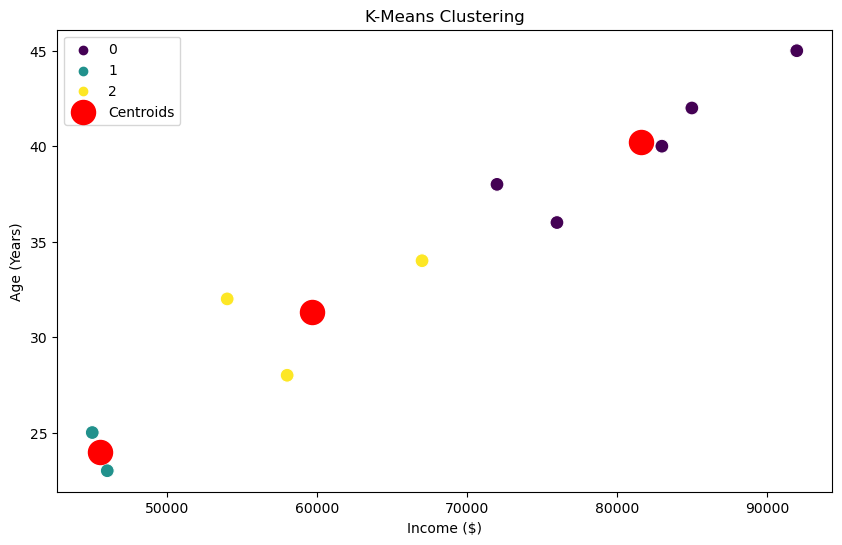

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Age', hue='Cluster', data=df, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Income ($)")
plt.ylabel("Age (Years)")
plt.legend()
plt.show()